`# <div style="text-align: center;font-weight:bold; font-size:300%; LINE-HEIGHT:125%">
ECE 614 Spring 2020 
</div>
<div style="text-align: center;font-weight:bold; font-size:200%; LINE-HEIGHT:125%"> 
        Laboratory #1 <br>
        Regression with Multilayer Perceptrons (MLP)<br> 
</div>
<div style="text-align: center; font-size:100%"> 
        <br><b>Objective:</b> To understand and implement nonlinear regression with multilayer perceptrons. Note that some lines of inactive code lines are preceded with # in preparation for other select tasks. Activate these code lines and alter/supplement as needed.
</div>

## Tasks
1. Run the code as given. Do this cell by cell by clicking the Run button. Perform two complete runs, one for the simple z function, another for z being the ackley function. 
2. In the Model Setup code block, change the activation functions of the hidden layer to 'relu' and train both models for the two z functions. How accurate is the regression for each z compared with Task 1 (example of the relu function is below in Appendix A).
3. In the Model Setup code block reverse the activation function back to sigmoid and set the number of neurons of the hidden layer from 10 to 100. Train the new models for both z. How do regression results compare to the regression in Task 1? Do not worry if results are poor. Sometimes a model can be too complex for a given task.
4. Change the number of neurons in the first layer back to 10. Add another Dense layer with 10 neurons before the output layer, and keep the sigmoid function. Train this new model for 25 epochs and visualize results.
5. Change the activation function from sigmoid to tanh and rerun Task 2. How do the results compare?
6. Train the model with random noise uniformly distributed between [-0.1 and +0.1] superimposed on each z function in the data generation code block. The noise is only added for the training part, but the final model needs to be tested on the accurate z values as defined for each function. 

## Imports
This lab will use the numpy for general and matrix mathematical functions, matplotlib for visualization, and  Keras for AI algorithms.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import random
from mpl_toolkits.mplot3d import Axes3D

from keras.layers.core import Dense
from keras.layers import Input
from keras.models import Sequential
from keras import optimizers

## Target Functions
One of the two functions defined below will be used to approximate regression.

In [0]:
def simple_function(x,y):
	z = x**2-y**2
	return z

In [0]:
def ackley_function(x, y):
	z = -20*np.exp(-0.2*np.sqrt(0.5*(x**2+y**2))) - np.exp(0.5*(np.cos(np.pi*x)+np.cos(np.pi*y))) + 20
	return z


## Load the Data

In [0]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


## Data Generation
Using one of the functions above, target data vectors are generated. An odd number of points is chosen to generate coordinates along each axis.

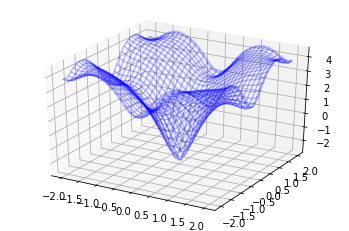

x (101,)
xv (101, 101)
y (101,)
yv (101, 101)


In [0]:
x = np.linspace(-2, 2, 101)
y = np.linspace(-2, 2, 101)
fig = plt.figure()
xv, yv = np.meshgrid(x, y)
noise = np.random.uniform(-0.1,0.1)
#z  = simple_function(xv, yv) + noise
z  = ackley_function(xv, yv) + noise
#z2  = simple_function(xv, yv)
z2  = ackley_function(xv, yv)
ax = fig.add_subplot(111,projection='3d')
ax.plot_wireframe(xv, yv, z, colors=(0,0,1,0.25))
plt.show()
print("x",x.shape)
print("xv",xv.shape)
print("y",y.shape)
print("yv",yv.shape)

## Data Reshaping
Keras models expect inputs to be tensors, where the first dimension defines each sample and later dimensions define the data in each sample.

In this case, the x and y data are reshaped and concatenated to form rows of coordinated pairs. The z, or target value, is reshaped in the same way.

In [0]:
x_col = xv.reshape(xv.shape[0]*xv.shape[1],1) #this is going to reshape the xcol to only one column
y_col = yv.reshape(yv.shape[0]*yv.shape[1],1)
xy_col = np.hstack((x_col, y_col))
z_col =  z.reshape(z.shape[0]* z.shape[1], 1)
print("xycol",xy_col.shape)
print("zcol",z_col.shape)

xycol (10201, 2)
zcol (10201, 1)


## Model Setup
Initially, a simple Sequential model is used for this task (one layer only feeding into the output layer with a single output neuron). Later in the experiment, one extra hidden layer is added. However, Keras allows for other more complex architectures (connections between non-consecutive layers, multiple input/output layers). These will not be covered here. Information on the types of models available in Keras can be found here:
https://keras.io/models/about-keras-models/. Consult the Keras site for full info https://keras.io

To begin, a model will be built with two layers, one hidden layer and one output layer. The hidden layer will have 10 perceptrons, with a sigmoid activation function. The output layer will have a single perceptron, with no activation function.

For a Sequential model in Keras, a base model is created and then layers are added to it in order. The Keras term for a layer of fully connected perceptrons is a Dense layer. The first argument of a Dense layer is the number of perceptrons. Following this is, optionally, the type of activation that will be used. This nonlinear, piecewise differentiable function is applied to the output of each perceptron after multiplication by weights and addition of bias. For the first layer, a definition of input shape is required. This refers to the dimensionality of each input vector. Later layers do not require this definition, as Keras' Dense contains the size definition.

The final layer is the ouput layer. This has just single perceptron here because the final output is a single real value, z. For regression, no nonlinear activation function is applied for the output neuron, as just the scalar product is output. Regression values would be too limited if the ouput layer had an activation function.

More information about the layers available in Keras can be found here: 
https://keras.io/layers/core/

The model needs an optimization method. This refers to the method for minimizing the loss function. This example will use Stochastic Gradient Descent (SGD). SGD is the same optimization method as the perceptron learning rule, calculated per batch instead of per sample. More information about available optimizers can be found at 
https://keras.io/optimizers/

Finally the model is compiled with the chosen optimizer (SGD) and loss function. For regression, mean squared error (mse) is typicaly used as the loss function. Other loss functions can be found here:
https://keras.io/losses/

Keras allows for custom versions of all of the above choices as well, however this lab will just use those that are needed.

In [0]:
model = Sequential()
model.add(Dense(10, activation='sigmoid', input_shape=(2,)))
#model.add(Dense(10, activation='sigmoid',))
model.add(Dense(1)) # input shape defined as 10 , output is a single neuron only 1 

sgd = optimizers.SGD(lr=.1, decay=0, momentum=.1)
model.compile(loss='mse',
              optimizer=sgd)
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                30        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


## Model Training
In Keras, forward propagation and error backpropagation are handled by the 'fit' function.

The first two arguments of the fit function are the input and output data, followed by the number of epochs, and the batch size. The optional 'verbose' argument can be used to turn off the output text. Many of the other options are available and will be used in future laboratories.

Options for compiling, fitting, and evaluating the model can be found here.
https://keras.io/models/model/

In [0]:
history = model.fit(xy_col, z_col, epochs=10, batch_size=10, verbose=1)

Epoch 1/10
10201/10201 [==============================] - 1s 117us/step - loss: 0.7515
Epoch 2/10
10201/10201 [==============================] - 1s 103us/step - loss: 0.0921
Epoch 3/10
10201/10201 [==============================] - 1s 98us/step - loss: 0.0455
Epoch 4/10
10201/10201 [==============================] - 1s 99us/step - loss: 0.0355
Epoch 5/10
10201/10201 [==============================] - 1s 102us/step - loss: 0.0305
Epoch 6/10
10201/10201 [==============================] - 1s 101us/step - loss: 0.0273
Epoch 7/10
10201/10201 [==============================] - 1s 102us/step - loss: 0.0242
Epoch 8/10
10201/10201 [==============================] - 1s 105us/step - loss: 0.0219
Epoch 9/10
10201/10201 [==============================] - 1s 104us/step - loss: 0.0194
Epoch 10/10
10201/10201 [==============================] - 1s 109us/step - loss: 0.0177


## Visualization
The %matplotlib qt will make a new, interactive window. Change the qt to inline for figures to appear in this window, but they will not be interactive.

The code below makes 5 plots: 3d view of the target function and the output of the trained model, two crossections along the x axis (at y=0, y=2), the model loss function vs. epochs, and the contour graph for the error defined as result=z-zpredicted

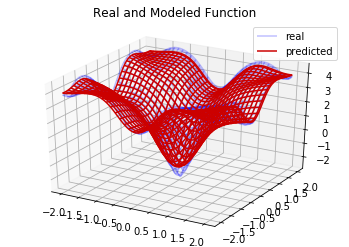

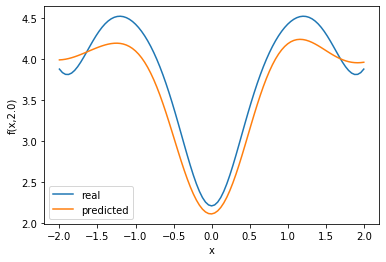

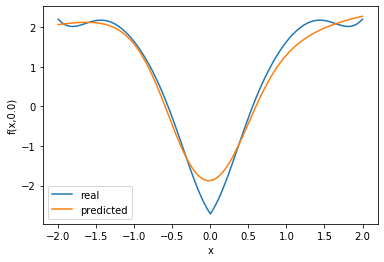

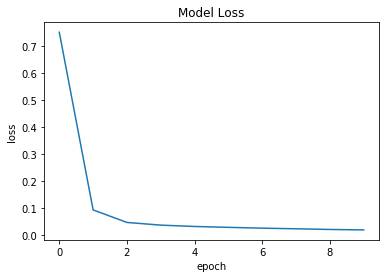

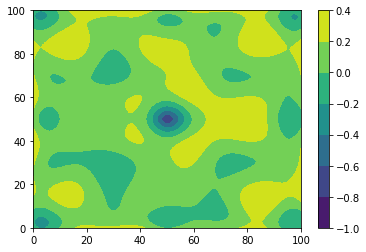

In [0]:
#matplotlib inline

z_pred = model.predict(xy_col)

fig = plt.figure()

#Create subplot with 3d axis for graphing regression inputs and outputs
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(xv, yv, z2, colors=(0,0,1,0.25))

ax.plot_wireframe(xv, yv, z_pred.reshape(z2.shape[0],z2.shape[1]), colors=(0.8, 0, 0, 1))
ax.title.set_text('Real and Modeled Function')
ax.legend(['real', 'predicted'])

fig1 = plt.figure()
#Create subplot of of cross section along y=2

ax2.plot(xv[100,:], z2[100,:])

ax2.plot(xv[100,:], z_pred.reshape(z2.shape[0],z2.shape[1])[100,:])
ax2.legend(['real', 'predicted'])
plt.ylabel('f(x,'+str(y[100])+')'); plt.xlabel('x')

fig2 = plt.figure()
#Create subplot of of cross section along y=0
ax3 = fig2.add_subplot(111)
ax3.plot(xv[50,:], z2[50,:])

ax3.plot(xv[50,:], z_pred.reshape(z2.shape[0],z2.shape[1])[50,:])
ax3.legend(['real', 'predicted'])
plt.ylabel('f(x,'+str(y[50])+')'); plt.xlabel('x')

fig4 = plt.figure()
#Create subplot of loss over training epochs.
ax4 = fig4.add_subplot(111)
ax4.plot(history.history['loss'])
ax4.title.set_text('Model Loss')
plt.ylabel('loss'); plt.xlabel('epoch')

fig5 = plt.figure()
z_pred=z_pred.reshape(z2.shape[0],z2.shape[1])
z2=z2.reshape(z2.shape[0],z2.shape[1])
#result = [[np.sqrt(np.abs((z2[i][j]**2) - (z_pred[i][j]**2)))  for j in range(len(z_pred[0]))] for i in range(len(z_pred[1]))]
result = [[(z2[i][j]) - (z_pred[i][j])  for j in range(len(z_pred[0]))] for i in range(len(z_pred[1]))]
cf = plt.contourf(result)
fig5.colorbar(cf)


plt.show()

## Appendix A Example Activation Functions

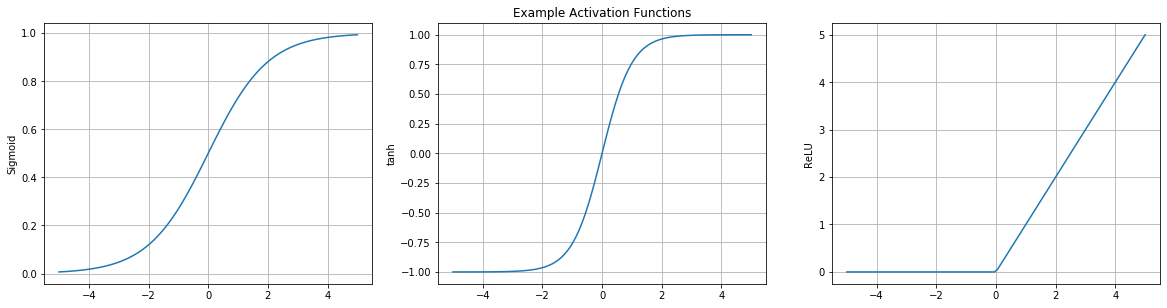

In [0]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from keras.activations import relu, tanh, sigmoid, hard_sigmoid 
from keras.backend import eval

x = np.linspace(-5,5,100)

fig = plt.figure(figsize=[20,4.8])
plt.subplot(1,3,1)
plt.plot(x, eval(sigmoid(x)))
plt.ylabel('Sigmoid')
plt.grid(True)

plt.subplot(1,3,2)
plt.plot(x, eval(tanh(x)))
plt.ylabel('tanh')
plt.grid(True)
plt.title('Example Activation Functions')

plt.subplot(1,3,3)
plt.plot(x, eval(relu(x)))
plt.ylabel('ReLU')
plt.grid(True)

plt.show()

$$\textrm{Sigmoid}(x) = \frac{1}{1+e^{-x}}$$


$$\textrm{tanh}(x) = \frac{\sinh(x)}{\cosh(x)} = \frac{e^x-e^{-x}}{e^x+e^{-x}}$$


$$\textrm{ReLU}(x) = \max(0,x)$$